In [133]:
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
from graph_theory import Algoritmo
from qiskit_tools import state_3layers, experimento_3l
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler


In [134]:
errores = (0,1,3)
direccion = True
n_q = 2
N_Q = 12
backend = FakeBrisbane()


In [135]:
brisbane = Algoritmo("ibm_brisbane", errores, n_q, N_Q, direccion)

para 2 qbits, [30, 31], 0.02015230530215807
para 3 qbits, [40, 41, 53], 0.04224585786175963
para 4 qbits, [30, 31, 32, 36], 0.06949101529395103
para 5 qbits, [30, 31, 32, 36, 51], 0.09901695591230325
para 6 qbits, [52, 56, 57, 58, 59, 60], 0.15818656763546976
para 7 qbits, [52, 56, 57, 58, 59, 60, 61], 0.227417202066171
para 8 qbits, [13, 12, 17, 30, 31, 32, 36, 51], 0.28446677863061737
para 9 qbits, [97, 98, 91, 79, 80, 81, 82, 83, 92], 0.41354531127093236
para 10 qbits, [100, 99, 98, 91, 79, 80, 81, 82, 83, 92], 0.4667131950338002
para 11 qbits, [101, 100, 99, 98, 91, 79, 80, 81, 82, 83, 92], 0.5074189088192768
para 12 qbits, [100, 99, 98, 91, 79, 80, 81, 82, 83, 92, 102, 103], 0.582190702818259


In [136]:
def state_3layers(nq):
    """
    Generates a quantum circuit for an entangled state with 3 gates layers.
    The output state is equivalent to a 1-dimensional Cluster State.
    Input:
        nq= qubit number
    Output:
        qc: quantum circuit 
    """
    qr=QuantumRegister(nq, "qr")
    cr=ClassicalRegister(nq,'cr')
    qc=QuantumCircuit(qr,cr)
    
    if nq%2==0: 
        #Si el numero de qubits es par, 
        #se coloca una primera capa de puertas raiz de X a todos los qubits
        for i in range(nq):
            qc.sx(int(i))
    else:
        #Si el numero de qubits es impar, 
        #se coloca una primera capa de puertas raiz de X a todos los qubits salvo el último
        #al último qubit se la aplica una puerta X.
        for i in range(nq - 1):
            qc.sx(i)
        qc.x(nq - 1)
        
    for i in range(0,nq - 1,2): #Primera capa de puertas ECR, van desde el qubit j->j+1 para j impar.
        qc.ecr(i,i + 1)
        
    for i in range(1,nq - 1,2): #Segunda capa de puertas ECR, van desde el qubit j->j+1 para j par.    
        qc.ecr(i,i + 1) 
    #Todas las puertas ECR van en la misma dirección. 
    
    qc.sx(0) #Se aplica una puerta raiz de X al qubit 0
    
    for i in range(nq):
        qc.measure(i, i)
         
    return qc


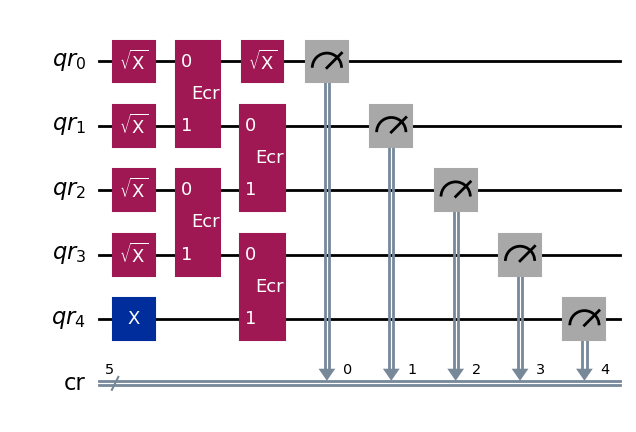

In [137]:
qc = state_3layers(5)
qc.draw('mpl')

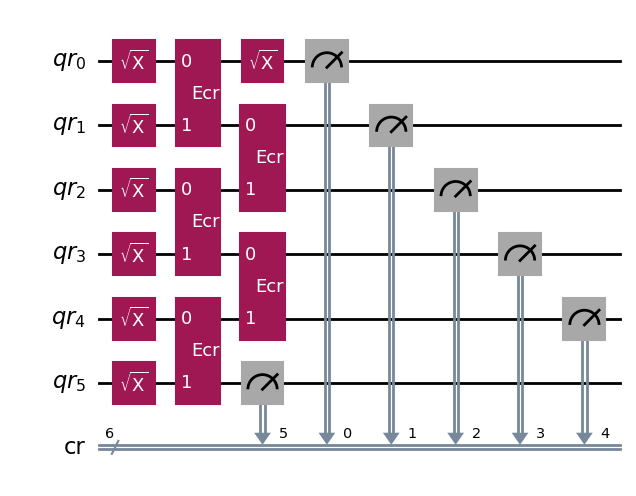

In [138]:
qc = state_3layers(6)
qc.draw('mpl')

In [164]:
qc = list()
for i in range(n_q, N_Q):
    qc.append(state_3layers(i))

In [166]:

from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

pm = generate_preset_pass_manager(optimization_level=0, backend=backend, initial_layout=brisbane[qc[-1].num_qubits - n_q])
l_qc = pm.run(qc)

l_qc.draw("mpl", idle_wires=False)

TranspilerError: 'The length of the layout is different than the size of the circuit: 11 <> 2'

156.25


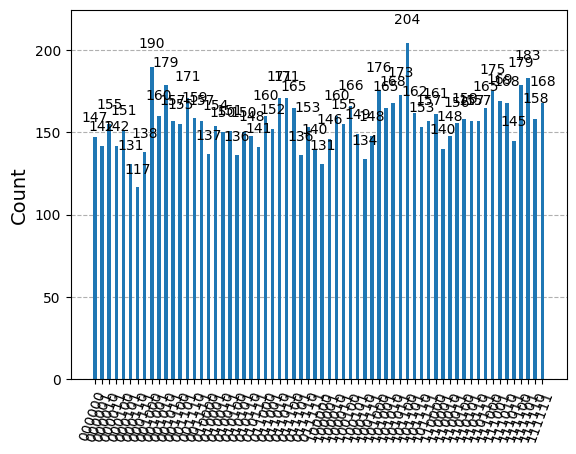

In [153]:
sampler = Sampler(backend=backend)
 
result = sampler.run([l_qc], shots=10000).result()
print(10000/(2**(qc.num_qubits)))
counts_sampler_0 = result[0].data.cr.get_counts()
plot_histogram(counts_sampler_0)

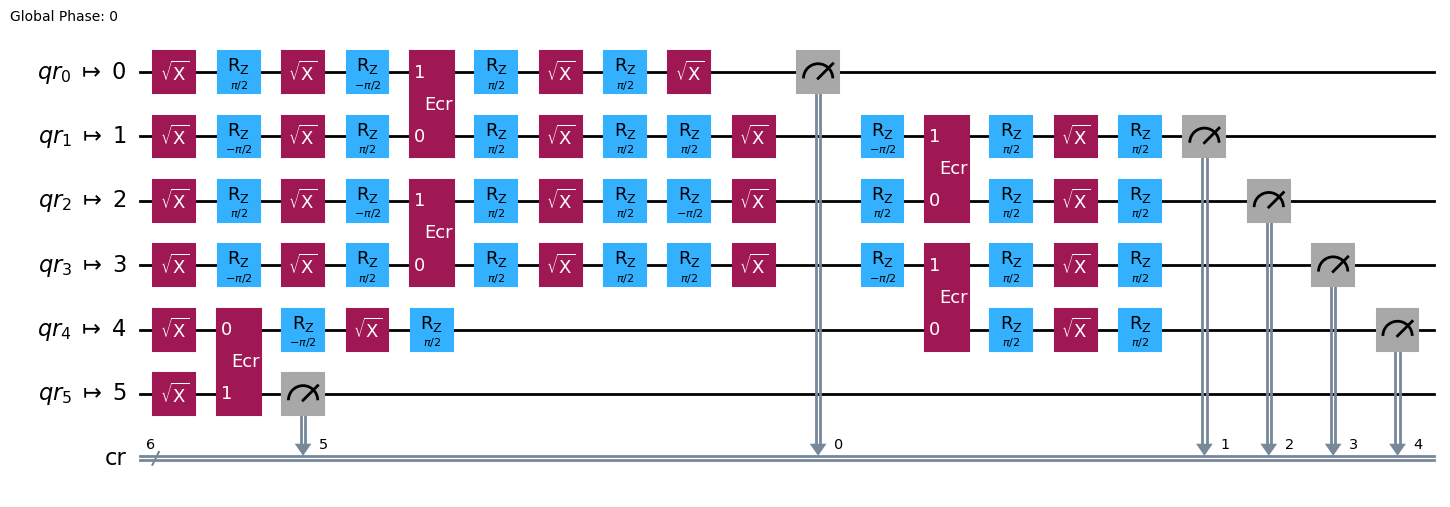

In [155]:
pm = generate_preset_pass_manager(optimization_level=0, backend=backend)
l_qc = pm.run(qc)
l_qc.draw("mpl", idle_wires=False)

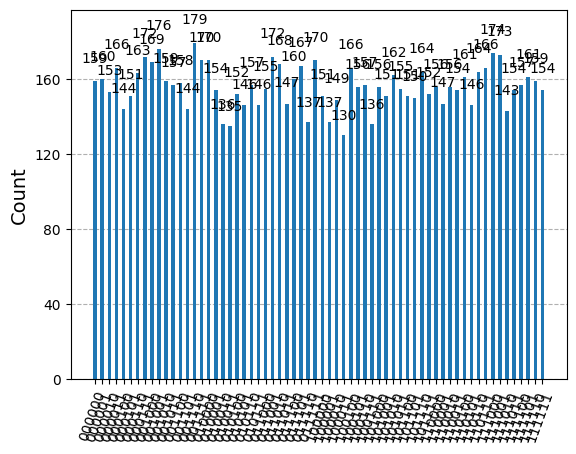

In [156]:
sampler = Sampler(backend=backend)
 
result = sampler.run([l_qc], shots=10000).result()

counts_sampler_1 = result[0].data.cr.get_counts()
plot_histogram(counts_sampler_1)

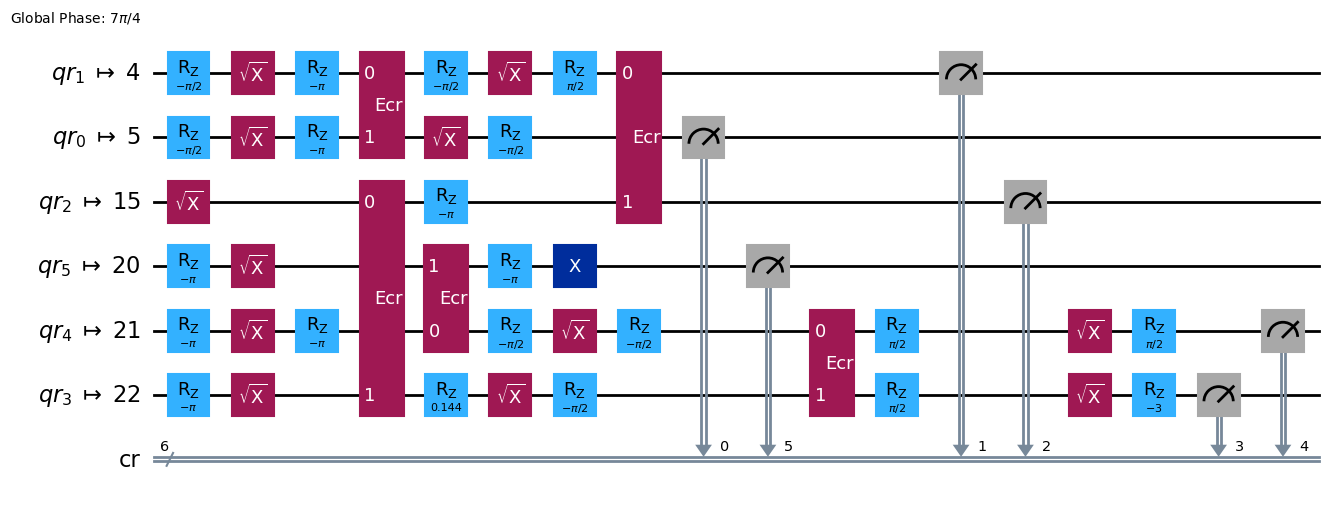

In [157]:
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
l_qc = pm.run(qc)
l_qc.draw("mpl", idle_wires=False)

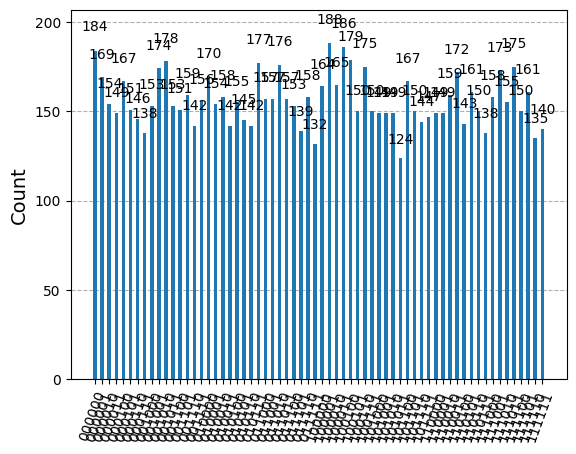

In [159]:
sampler = Sampler(backend=backend)
 
result = sampler.run([l_qc], shots=10000).result()

counts_sampler_2 = result[0].data.cr.get_counts()
plot_histogram(counts_sampler_2)

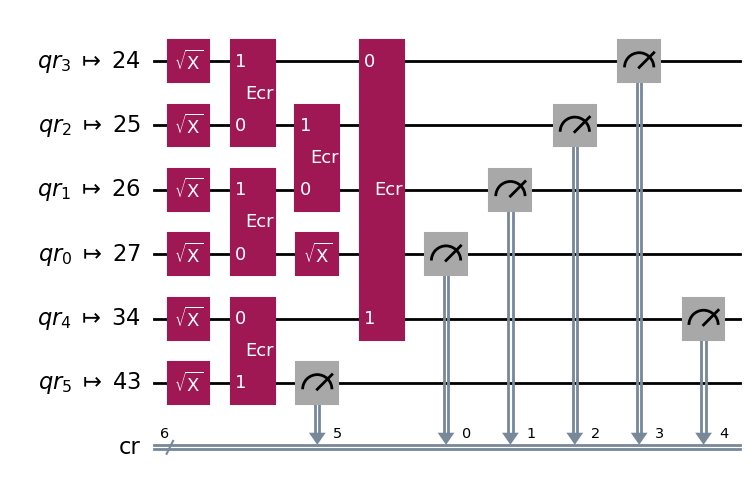

In [160]:
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

pm = generate_preset_pass_manager(optimization_level=0, backend=backend, initial_layout=[27, 26, 25, 24, 34, 43])
l_qc = pm.run(qc)
l_qc.draw("mpl", idle_wires=False)


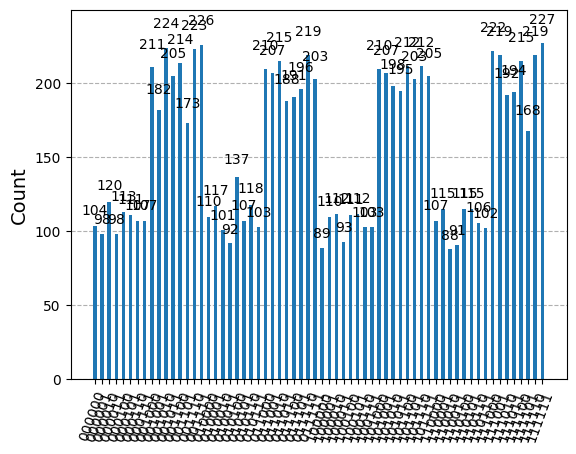

In [161]:

sampler = Sampler(backend=backend)
 
result = sampler.run([l_qc], shots=10000).result()

counts_sampler_3 = result[0].data.cr.get_counts()
plot_histogram(counts_sampler_3)

In [162]:
import numpy as np

def hellinger_3l(count_sampler):
    prob = 1/(2**len(list(counts_sampler_0.keys())[0]))
    prob_ideal = [prob for i in range (2**len(list(counts_sampler_0.keys())[0]))]
    
    prob_experimental = list()
    for i in count_sampler.keys():
        prob_experimental.append(int(count_sampler[i])/10000)
        
    #print(prob_ideal)
    #print(prob_experimental)
    distance = np.sqrt(0.5 * np.sum((np.sqrt(prob_ideal) - np.sqrt(prob_experimental)) ** 2))
    print(f"la distancia de hellinger es: {distance}")
    
    return distance


In [163]:
hellinger_3l(counts_sampler_0)
hellinger_3l(counts_sampler_1)
hellinger_3l(counts_sampler_2)
hellinger_3l(counts_sampler_3)

la distancia de hellinger es: 0.03410994465214986
la distancia de hellinger es: 0.024634930899514143
la distancia de hellinger es: 0.030830200133201348
la distancia de hellinger es: 0.1175253139829446


0.1175253139829446